In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('penguins.csv')

In [29]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [30]:
df.shape

(344, 5)

In [31]:
for i,row in df.iterrows():
  null_values = row.isnull().sum().sum()
  if null_values > 0 :
    print(f'Row at index {i} has {null_values} missing values')

Row at index 3 has 5 missing values
Row at index 8 has 1 missing values
Row at index 10 has 1 missing values
Row at index 11 has 1 missing values
Row at index 47 has 1 missing values
Row at index 246 has 1 missing values
Row at index 286 has 1 missing values
Row at index 324 has 1 missing values
Row at index 339 has 5 missing values


In [32]:
df.dropna(inplace=True)

In [33]:
df.shape

(335, 5)

In [34]:
df[df['sex']=='.']

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [35]:
df = df[df['sex'] != '.']

In [36]:
df.shape

(334, 5)

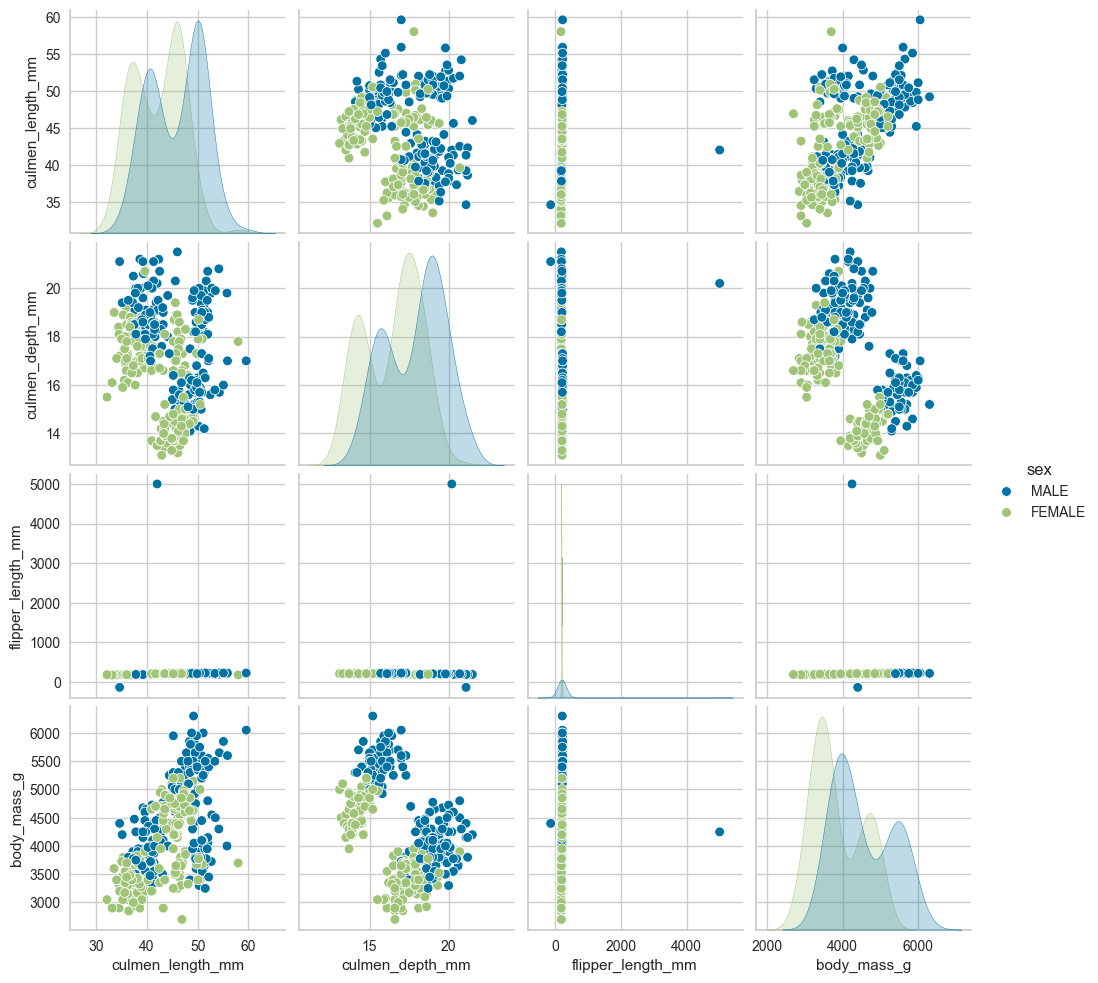

In [37]:
sns.pairplot(df,hue='sex')

In [38]:
df['sex'].value_counts()

sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [39]:
df = df[df['flipper_length_mm'] < 4000]

In [40]:
df['flipper_length_mm'].max()

231.0

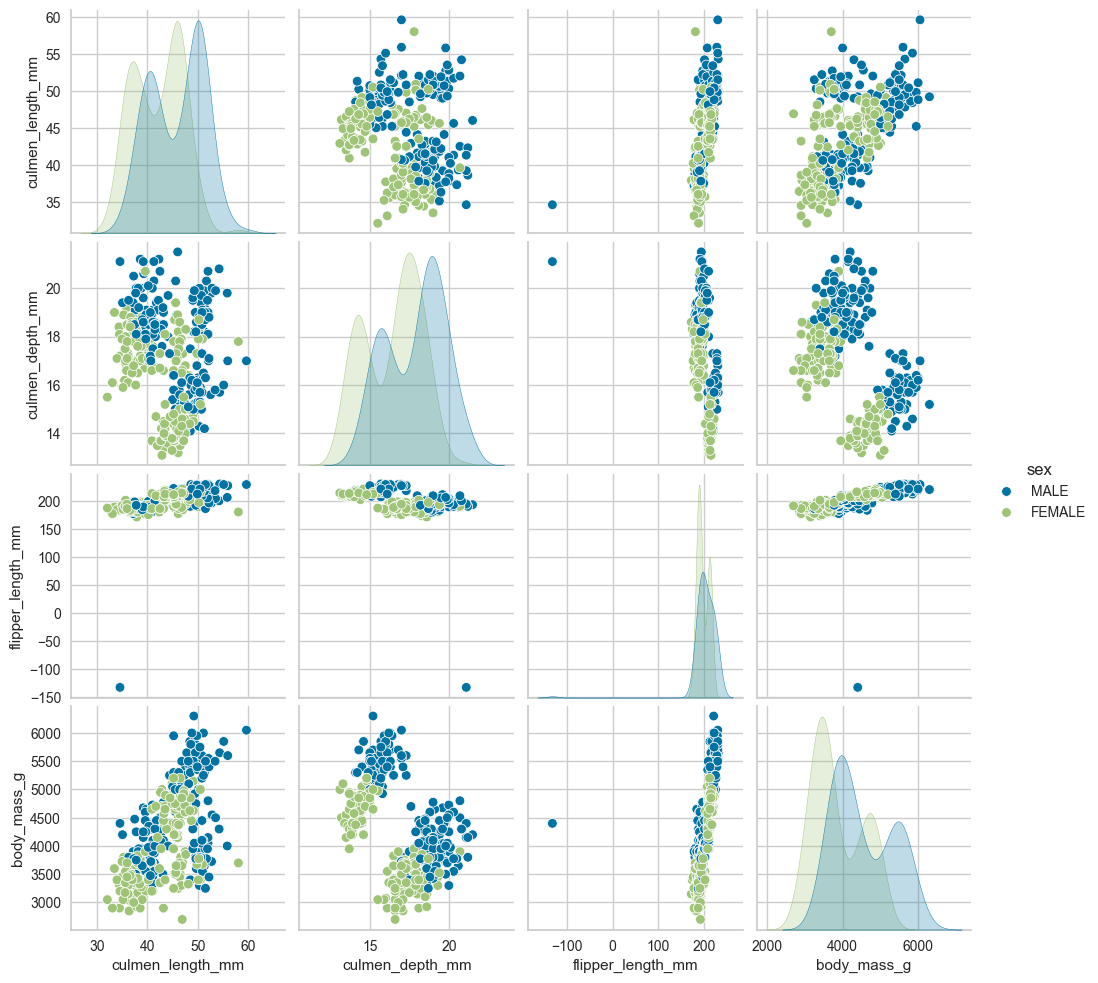

In [41]:
sns.pairplot(df,hue='sex')

In [42]:
df = df[df['flipper_length_mm'] > 0]

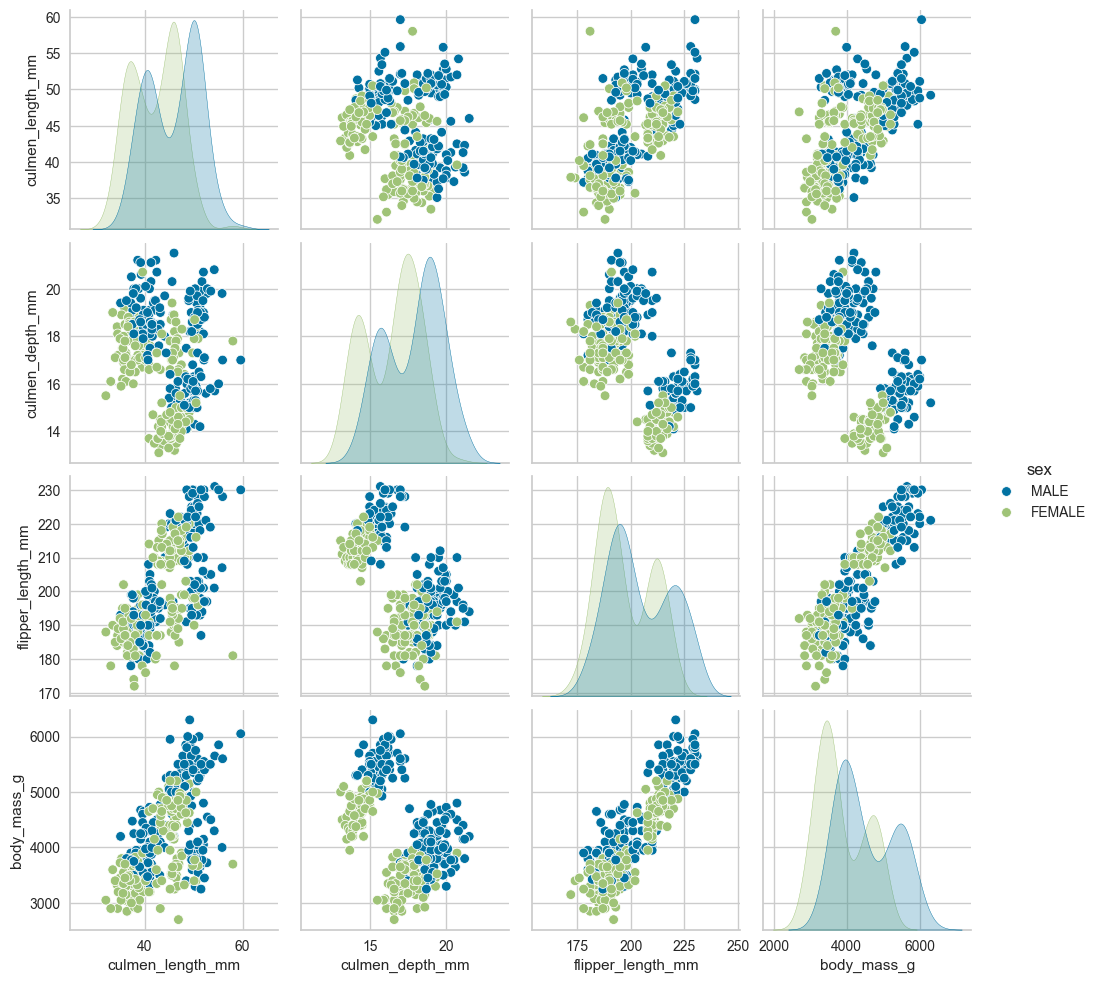

In [43]:
sns.pairplot(df,hue='sex')

In [44]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='MALE' else 0)

C:\Users\maab9\AppData\Local\Temp\ipykernel_10564\1599645034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].apply(lambda x: 1 if x=='MALE' else 0)


In [53]:
n_components = len(df.columns)
pca = PCA(n_components=3)

In [54]:
df_pca = pca.fit_transform(df)

In [55]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

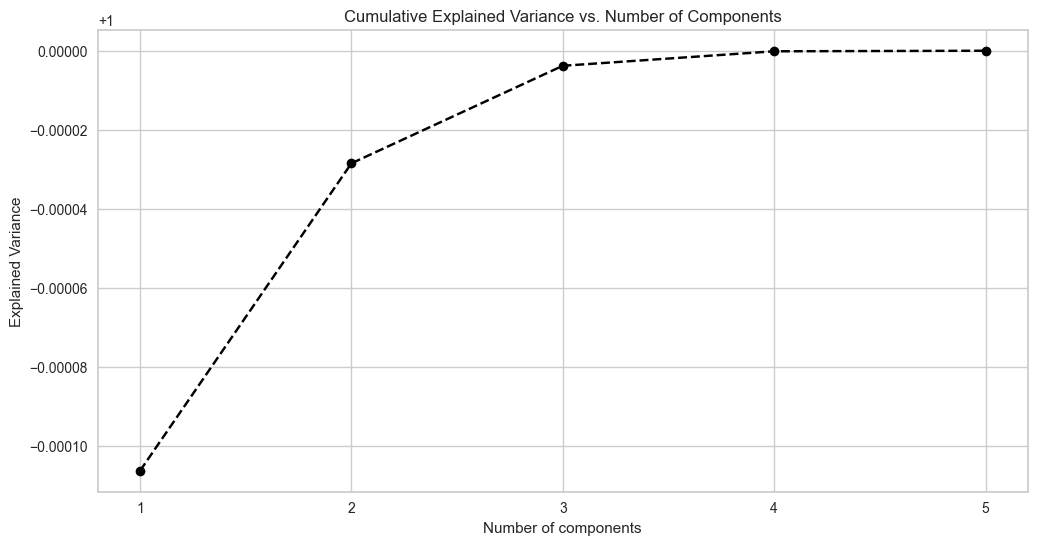

In [52]:
plt.figure(figsize=(12,6))
plt.plot(range(1,n_components+1),cumulative_explained_variance,marker='o',color='black',linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xticks(np.arange(1,n_components+1,1))
plt.grid(True)
plt.show()

In [56]:
cumulative_explained_variance

array([0.99989362, 0.99997148, 0.99999619])

In [57]:
df_pca_cols = ['PC1','PC2','PC3']

In [58]:
df_pca = pd.DataFrame(df_pca,columns=df_pca_cols)

In [59]:
df_pca.head()


,PC1,PC2,PC3
0,-456.744209,13.390767,1.150059
1,-406.671577,9.198629,-0.150572
2,-956.463909,-8.160530,-2.488867
3,-756.535115,-1.885203,-4.903289
4,-556.596380,3.407455,-1.144440


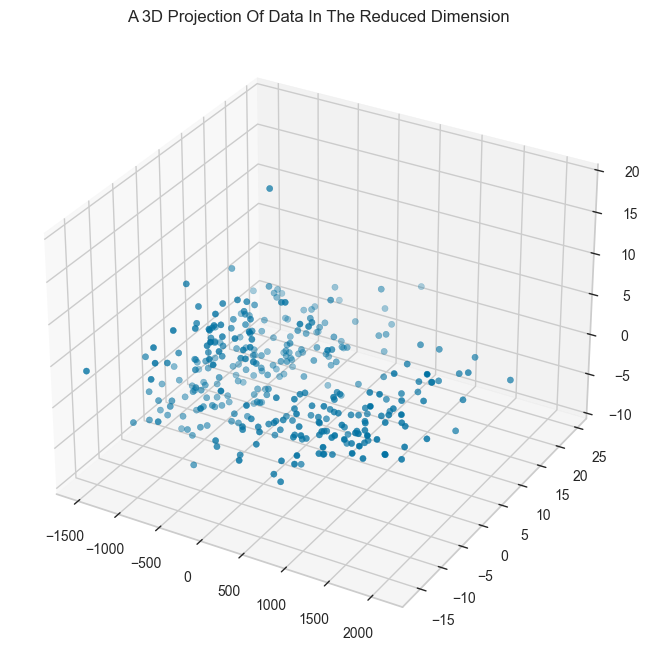

In [60]:
x = df_pca['PC1']
y = df_pca['PC2']
z = df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


c:\Users\maab9\anaconda3\envs\ML\lib\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\maab9\anaconda3\envs\ML\lib\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


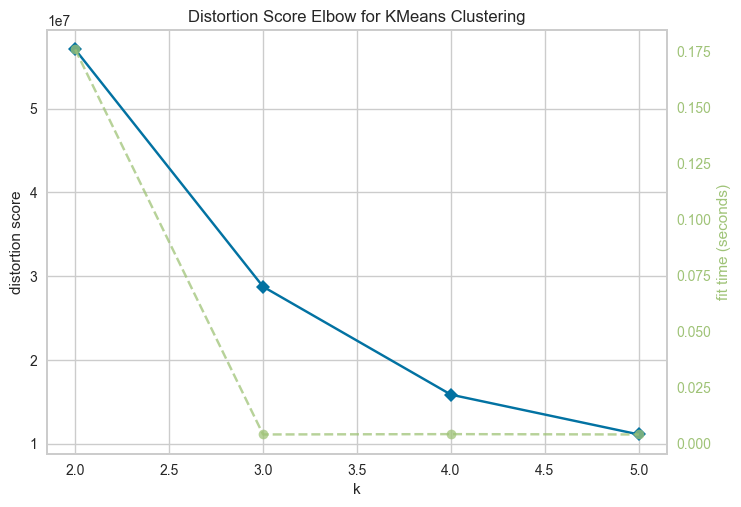

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=5)
Elbow_M.fit(df_pca)
Elbow_M.show()

In [62]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(df_pca)
df_pca["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

C:\Users\maab9\AppData\Local\Temp\ipykernel_10564\25040206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clusters"]= yhat_AC


In [63]:
df_pca['Clusters']

0      0
1      0
2      0
3      0
4      0
      ..
327    1
328    1
329    3
330    1
331    3
Name: Clusters, Length: 332, dtype: int64

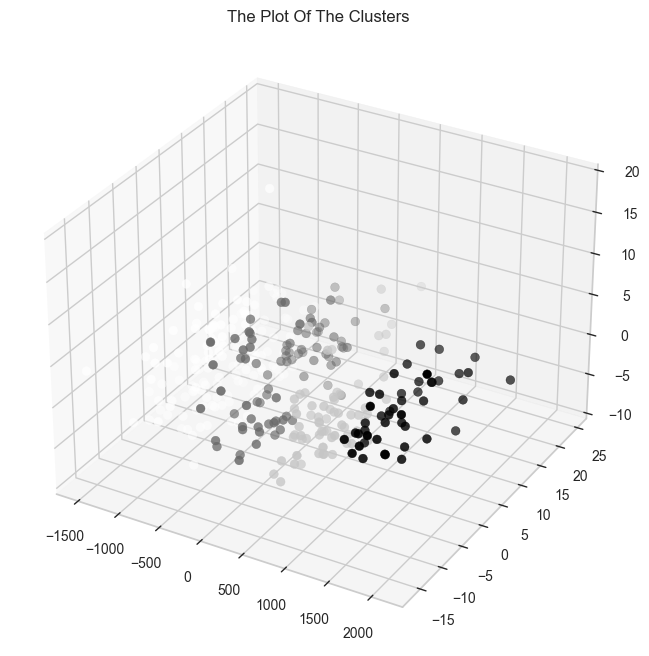

In [64]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

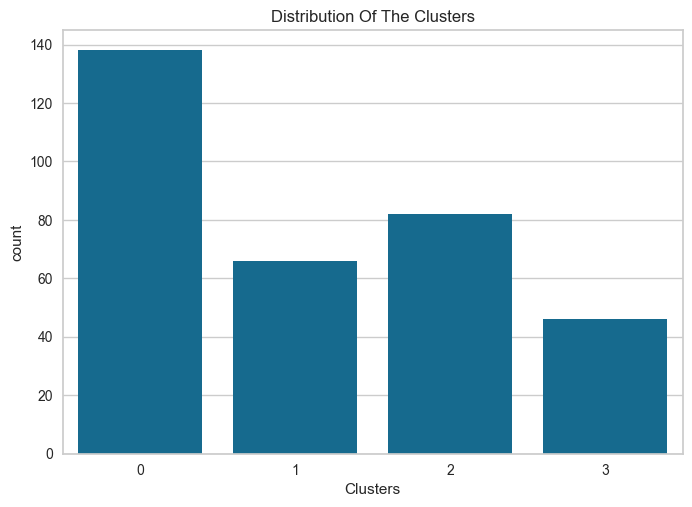

In [68]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

<Axes: xlabel='body_mass_g', ylabel='culmen_length_mm'>

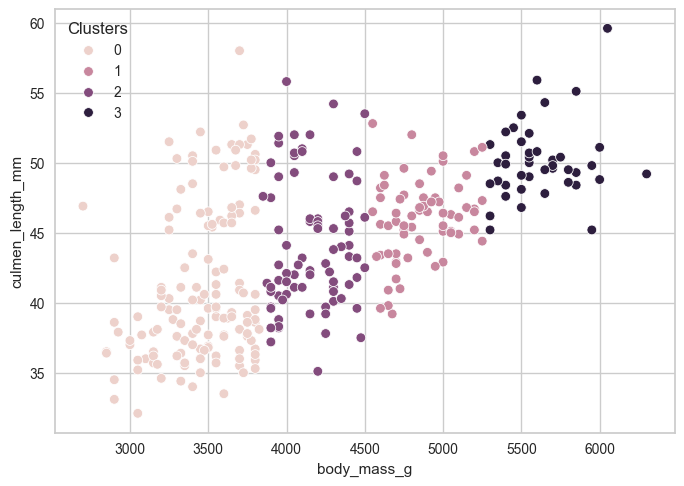

In [69]:
sns.scatterplot(x=df['body_mass_g'],y=df['culmen_length_mm'],hue=df['Clusters'])

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

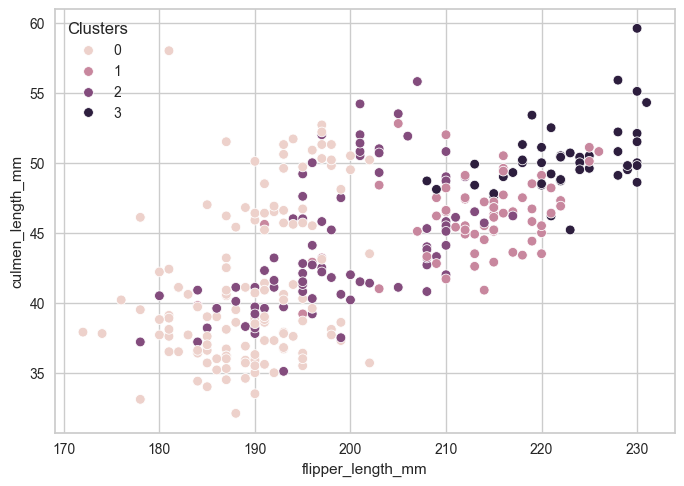

In [71]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['culmen_length_mm'],hue=df['Clusters'])

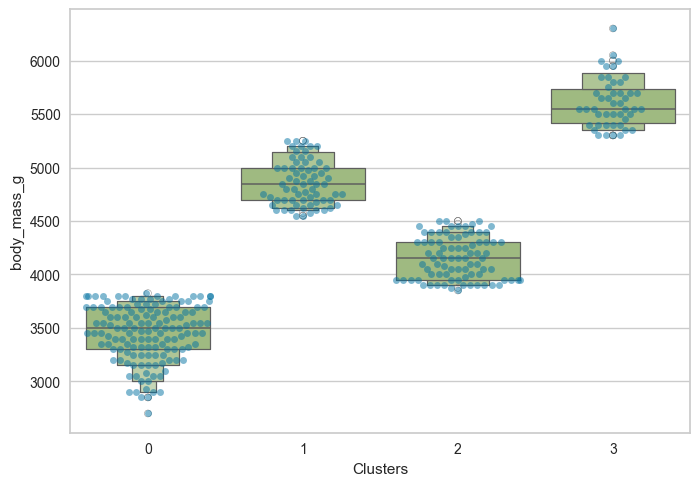

In [72]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["body_mass_g"], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["body_mass_g"])
plt.show()

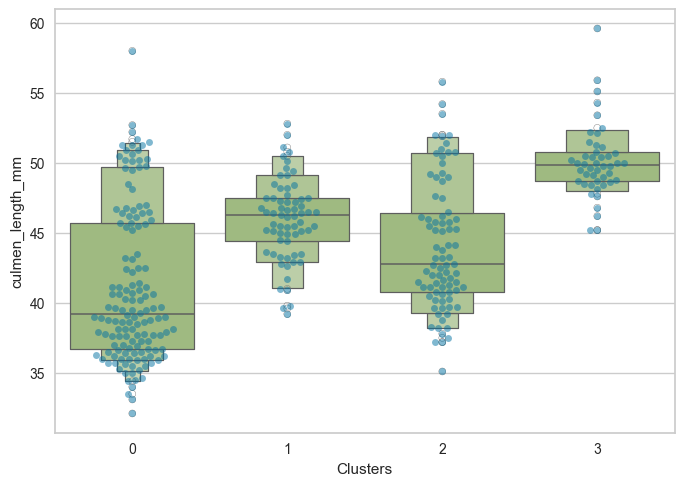

In [73]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df['culmen_length_mm'], alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df['culmen_length_mm'])
plt.show()

In [75]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'Clusters'],
      dtype='object')

<Figure size 800x550 with 0 Axes>

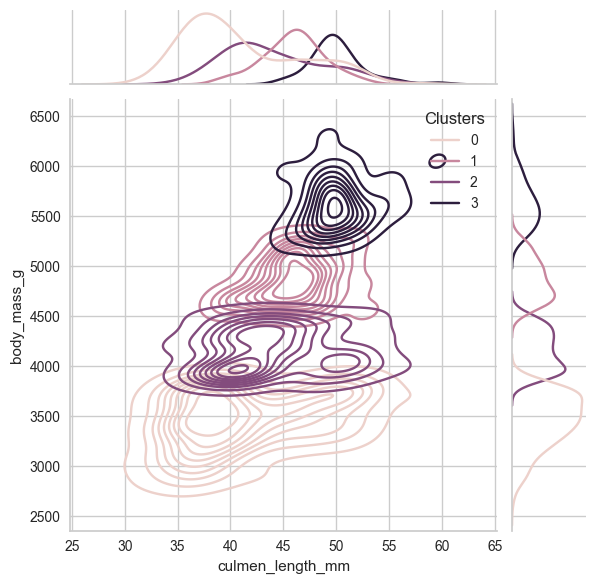

<Figure size 800x550 with 0 Axes>

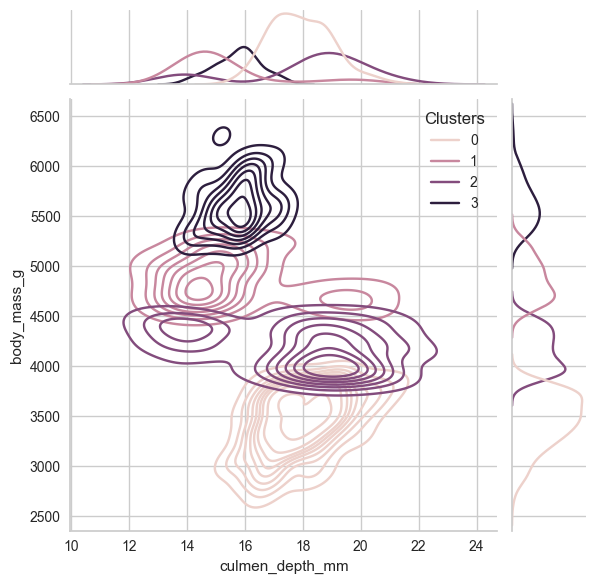

<Figure size 800x550 with 0 Axes>

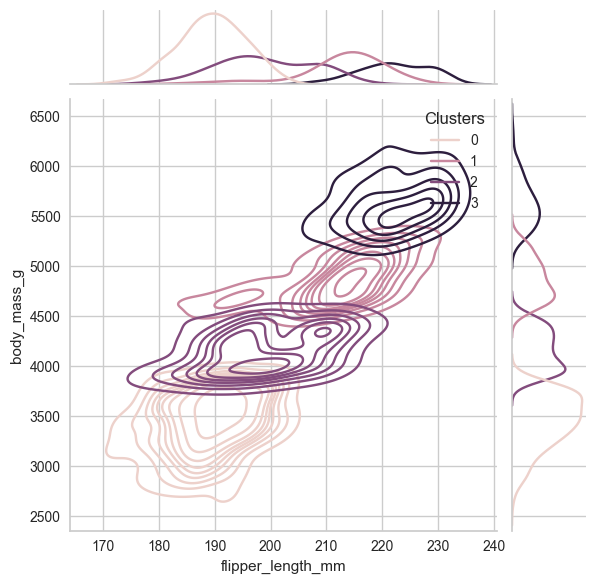

<Figure size 800x550 with 0 Axes>

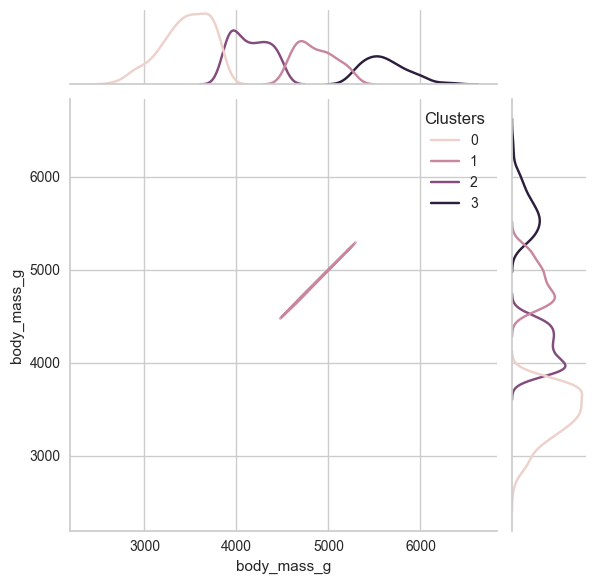

In [76]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g']

for feature in features:
    plt.figure()
    sns.jointplot(x=df[feature], y=df["body_mass_g"], hue =df["Clusters"], kind="kde")
    plt.show()